Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-09 07:42:01.897193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-09 07:42:03.687794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 1506s 2s/step - accuracy: 0.6766 - loss: 0.9804 - val_accuracy: 0.8041 - val_loss: 0.5557
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1448s 2s/step - accuracy: 0.7909 - loss: 0.5943 - val_accuracy: 0.8049 - val_loss: 0.5548
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1460s 2s/step - accuracy: 0.8063 - loss: 0.5636 - val_accuracy: 0.8199 - val_loss: 0.5006
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1452s 2s/step - accuracy: 0.8156 - loss: 0.5291 - val_accuracy: 0.8166 - val_loss: 0.5206
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1413s 2s/step - accuracy: 0.8198 - loss: 0.5186 - val_accuracy: 0.8343 - val_loss: 0.4718
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1417s 2s/step - accuracy: 0.8277 - loss: 0.4970 - val_accuracy: 0.8148 - val_loss: 0.5239
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1412s 2s/step - accuracy: 0.8302 - loss: 0.4838 - val_accuracy: 0.8453 - val_loss: 0.4477
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1433s 2s/step - accuracy: 0.8361 - loss: 0.4765 - val_accurac

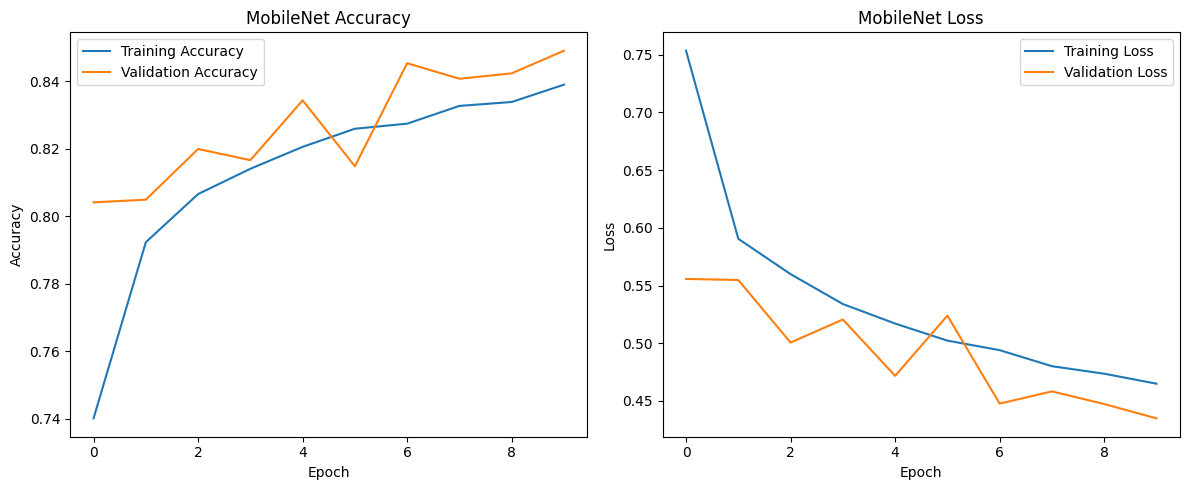

In [1]:
#I acknowledge using Artificial Intelligence for generating this code.


import os
import numpy as np
from tensorflow.keras.datasets import cifar10
from PIL import Image

def save_cifar10_to_directory():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Set up directories for train and test images
    train_dir = "cifar10_data/train"
    test_dir = "cifar10_data/test"
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Create class directories
    for class_name in class_names:
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Save train images
    for i in range(len(x_train)):
        class_name = class_names[y_train[i][0]]
        img = Image.fromarray(x_train[i])
        img.save(os.path.join(train_dir, class_name, f"{i}.png"))

    # Save test images
    for i in range(len(x_test)):
        class_name = class_names[y_test[i][0]]
        img = Image.fromarray(x_test[i])
        img.save(os.path.join(test_dir, class_name, f"{i}.png"))

# Run the function to save images
save_cifar10_to_directory()


import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set up ImageDataGenerators with on-the-fly resizing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

# Load images from directories and resize to 224x224
train_generator = train_datagen.flow_from_directory(
    "cifar10_data/train",
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    "cifar10_data/test",
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

# Load the pre-trained MobileNet model without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

# Final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MobileNet Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MobileNet Loss')

plt.tight_layout()
plt.show()
